# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# API Docs ask for unit specification. Specifying imperial.
units = "imperial"

# API Request URL - open '&q=' at end of URL for adding city name at end of URL for future looping
req_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={units}&q="


# Declare Variables
city_name = []
city_lat = []
city_lng = []
city_temp = []
city_max_temp = []
city_humidity = []
city_cloudy = []
city_winds = []
city_country = []
city_date = []
request = 1
query_set = 1

# print initial header before displaying for loop  data
print("Beginning Data Retrieval")
print("----------------------------")

# --- for loop go through the list of cities and perform a request for data on each city ---
for city in cities:
    
    # Attach city array contents to req_url
    query_url = req_url + city
    
    # Store requested data in local json variable to limit API calls
    data = requests.get(query_url).json()
    
    # Gather and store data in arrays
    try:
        print(f"Processing Record {request} of Set {query_set} | {city}")  
        city_name.append(data["name"])
        city_country.append(data["sys"]["country"])
        city_lat.append(data["coord"]["lat"])
        city_lng.append(data["coord"]["lon"])    
        city_temp.append(data["main"]["temp"])
        city_max_temp.append(data["main"]["temp_max"])
        city_humidity.append(data["main"]["humidity"])
        city_cloudy.append(data["clouds"]["all"])
        city_winds.append(data["wind"]["speed"])
        city_date.append(data["dt"])
        
        # Add one for every 'try'
        request += 1
        
        # If statement to split API call into 'sets'
        if request > 50:
            
            # Prepare for next API call, split into 'sets' of calls.
            query_set += 1
            
            # Reset variables for next iteration
            request = 1
            
            # Sleep to add delay limitation for API calls
            request.sleep(1)
    
    except:
        print(f"City '{city}' not found. Skipping...")

# Print showing data is done being gathered
print("!---------------------------!")
print("Data Retrieval Complete")
print("!--------------------------!")

Beginning Data Retrieval
----------------------------
Processing Record 1 of Set 1 | tuatapere
Processing Record 2 of Set 1 | panjab
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | singapore
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | lavrentiya
Processing Record 7 of Set 1 | kodiak
Processing Record 8 of Set 1 | moranbah
Processing Record 9 of Set 1 | bull savanna
Processing Record 10 of Set 1 | punta arenas
Processing Record 11 of Set 1 | bambous virieux
Processing Record 12 of Set 1 | nanortalik
Processing Record 13 of Set 1 | maunabo
Processing Record 14 of Set 1 | hithadhoo
Processing Record 15 of Set 1 | attawapiskat
City 'attawapiskat' not found. Skipping...
Processing Record 15 of Set 1 | tasiilaq
Processing Record 16 of Set 1 | illoqqortoormiut
City 'illoqqortoormiut' not found. Skipping...
Processing Record 16 of Set 1 | port alfred
Processing Record 17 of Set 1 | fomboni
Processing Record 18 of Set 1 | khor
Processing Record 19 

Processing Record 10 of Set 4 | grand river south east
City 'grand river south east' not found. Skipping...
Processing Record 10 of Set 4 | kalmunai
Processing Record 11 of Set 4 | visnes
Processing Record 12 of Set 4 | cidreira
Processing Record 13 of Set 4 | clovis
Processing Record 14 of Set 4 | wenzhou
Processing Record 15 of Set 4 | biak
Processing Record 16 of Set 4 | ngaoundere
Processing Record 17 of Set 4 | necochea
Processing Record 18 of Set 4 | fallon
Processing Record 19 of Set 4 | zeya
Processing Record 20 of Set 4 | namie
Processing Record 21 of Set 4 | ilmatsalu
Processing Record 22 of Set 4 | blackwater
Processing Record 23 of Set 4 | longyearbyen
Processing Record 24 of Set 4 | dwarka
Processing Record 25 of Set 4 | sayat
Processing Record 26 of Set 4 | khonuu
City 'khonuu' not found. Skipping...
Processing Record 26 of Set 4 | college
Processing Record 27 of Set 4 | solnechnyy
Processing Record 28 of Set 4 | talcahuano
Processing Record 29 of Set 4 | berbera
Processi

Processing Record 23 of Set 7 | warqla
City 'warqla' not found. Skipping...
Processing Record 23 of Set 7 | kuala terengganu
Processing Record 24 of Set 7 | puerto escondido
Processing Record 25 of Set 7 | hopatcong
Processing Record 26 of Set 7 | padang
Processing Record 27 of Set 7 | mackay
Processing Record 28 of Set 7 | saulkrasti
Processing Record 29 of Set 7 | guichicovi
City 'guichicovi' not found. Skipping...
Processing Record 29 of Set 7 | toucheng
Processing Record 30 of Set 7 | flinders
Processing Record 31 of Set 7 | asau
Processing Record 32 of Set 7 | roebourne
Processing Record 33 of Set 7 | ust-nera
Processing Record 34 of Set 7 | chokurdakh
Processing Record 35 of Set 7 | falmouth
Processing Record 36 of Set 7 | san quintin
Processing Record 37 of Set 7 | manjacaze
Processing Record 38 of Set 7 | tenenkou
Processing Record 39 of Set 7 | souillac
Processing Record 40 of Set 7 | ossora
Processing Record 41 of Set 7 | aksarka
Processing Record 42 of Set 7 | broome
Process

Processing Record 42 of Set 10 | roma
Processing Record 43 of Set 10 | shenjiamen
Processing Record 44 of Set 10 | palabuhanratu
City 'palabuhanratu' not found. Skipping...
Processing Record 44 of Set 10 | grand centre
City 'grand centre' not found. Skipping...
Processing Record 44 of Set 10 | uribia
Processing Record 45 of Set 10 | bulaevo
Processing Record 46 of Set 10 | nemuro
Processing Record 47 of Set 10 | hobyo
Processing Record 48 of Set 10 | koygorodok
Processing Record 49 of Set 10 | mastic beach
Processing Record 50 of Set 10 | gloversville
City 'gloversville' not found. Skipping...
Processing Record 1 of Set 11 | kelvington
Processing Record 2 of Set 11 | nantucket
Processing Record 3 of Set 11 | chicla
Processing Record 4 of Set 11 | gamba
Processing Record 5 of Set 11 | bardiyah
Processing Record 6 of Set 11 | labuhan
Processing Record 7 of Set 11 | cabral
Processing Record 8 of Set 11 | narasannapeta
Processing Record 9 of Set 11 | sioux lookout
Processing Record 10 of S

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Create Dataframe for retrieved data
city_df = pd.DataFrame({"City": city_name,
                                "Country": city_country,
                                "Date": city_date,
                                "Lat": city_lat,
                                "Lng": city_lng,
                                "Max Temp (F)": city_max_temp,
                                "Humidity (%)": city_humidity,
                                "Cloudiness (%)": city_cloudy,
                                "Wind Speed (mph)": city_winds,
                                })

# Convert unix numbers in date column to readable datetime
city_df["Date"] = pd.to_datetime(city_df["Date"], unit = "s")

# Export retrieved data 
city_df.to_csv("cities.csv", index=True, index_label="City ID", header=True)

city_df

,City,Country,Date,Lat,Lng,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,Tuatapere,NZ,2021-08-09 21:47:12,-46.1333,167.6833,44.82,87,92,6.60
1,Panjāb,AF,2021-08-09 21:47:12,34.3880,67.0233,51.48,40,0,5.53
2,Ushuaia,AR,2021-08-09 21:45:31,-54.8000,-68.3000,46.06,49,20,4.61
3,Singapore,SG,2021-08-09 21:42:30,1.2897,103.8501,82.35,90,75,3.44
4,Albany,US,2021-08-09 21:47:13,42.6001,-73.9662,85.46,62,42,6.76
...,...,...,...,...,...,...,...,...,...
552,Daru,PG,2021-08-09 21:51:01,-9.0763,143.2092,77.43,88,72,16.26
553,Camalú,MX,2021-08-09 21:51:02,30.8500,-116.0667,79.43,64,34,8.52
554,Mount Gambier,AU,2021-08-09 21:51:02,-37.8333,140.7667,51.71,62,75,14.97
555,Lyngdal,NO,2021-08-09 21:51:02,58.1376,7.0700,61.90,80,100,5.88


In [6]:
city_df.describe()

,Lat,Lng,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
count,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000
mean,20.231614,20.317217,69.465189,72.520646,51.384201,7.823303
std,33.014323,90.121962,13.926671,19.810660,38.428336,5.795838
min,-54.800000,-175.200000,35.830000,11.000000,0.000000,0.000000
25%,-4.085000,-62.996700,58.980000,62.000000,12.000000,3.620000
50%,21.444700,23.283300,70.970000,77.000000,48.000000,6.530000
75%,49.750200,102.500000,79.680000,88.000000,90.000000,10.710000
max,78.218600,179.316700,106.390000,100.000000,100.000000,36.820000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
humidity_over_max = city_df.loc[city_df["Humidity (%)"] > 100, :]

if humidity_over_max.empty == True:
    print("There are no cities with humidity values over 100%")
    print("Skipping forward...")
    
    # Extract relevant fields
    latitudes = city_df["Lat"]
    temperatures = city_df["Max Temp (F)"]
    humidity = city_df["Humidity (%)"]
    cloudiness = city_df["Cloudiness (%)"]
    windspeed = city_df["Wind Speed (mph)"]
    
else:
    # Grab overly humid locations
    humidity_index = humidity_over_max.index
    
    # Store in new dataframe
    removed_overhumid_city_df = city_df.drop(humidity_index).reset_index(drop=True)
    
    # Extract relevant fields
    latitudes = clean_city_df["Lat"]
    temperatures = clean_city_df["Max Temp (F)"]
    humidity = clean_city_df["Humidity (%)"]
    cloudiness = clean_city_df["Cloudiness (%)"]
    windspeed = clean_city_df["Wind Speed (mph)"]

There are no cities with humidity values over 100%
Skipping forward...


In [21]:
#  Get the indices of cities that have humidity over 100%.
# SKIPPED BECAUSE THERE ARE NO CITIES OVER 100% HUMIDITY, SEE ABOVE IF STATEMENT

In [22]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
# DONE ABOVE WITH IF STATEMENT

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

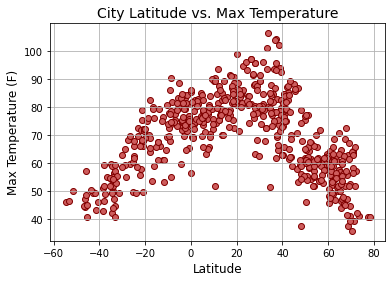

In [8]:
plt.scatter(latitudes, temperatures, marker="o", facecolors="indianred", edgecolors="maroon")

plt.title("City Latitude vs. Max Temperature", fontsize=14)
plt.ylabel("Max Temperature (F)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid()

plt.savefig("../Images/latitude-vs-temp.png")
plt.show()

## Latitude vs. Humidity Plot

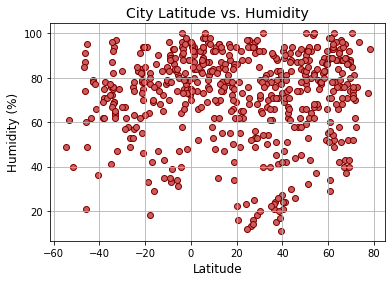

In [9]:
plt.scatter(latitudes, humidity, marker="o", facecolors="indianred", edgecolors="maroon")

plt.title("City Latitude vs. Humidity", fontsize=14)
plt.ylabel("Humidity (%)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid()

plt.savefig("../Images/latitude-vs-humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

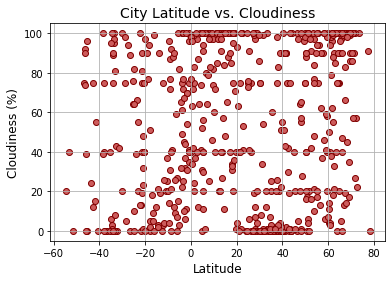

In [10]:
plt.scatter(latitudes, cloudiness, marker="o", facecolors="indianred", edgecolors="maroon")

plt.title("City Latitude vs. Cloudiness", fontsize=14)
plt.ylabel("Cloudiness (%)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid()

plt.savefig("../Images/latitude-vs-cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

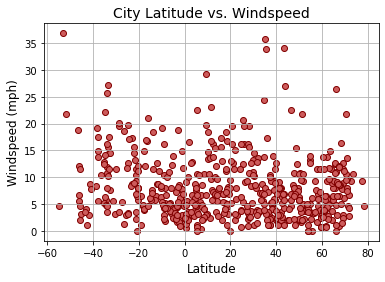

In [11]:
plt.scatter(latitudes, windspeed, marker="o", facecolors="indianred", edgecolors="maroon")

plt.title("City Latitude vs. Windspeed", fontsize=14)
plt.ylabel("Windspeed (mph)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid()

plt.savefig("../Images/latitude-vs-windspeed.png")
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [12]:
# Drop overly humid areas
if humidity_over_max.empty == True:
    northern_hemisphere = city_df.loc[city_df["Lat"] >= 0, :].copy().reset_index(drop=True)
else:
    northern_hemisphere = clean_city_df.loc[clean_city_df["Lat"] >= 0, :].copy().reset_index(drop=True)
    
# Drop overly humid areas
if humidity_over_max.empty == True:
    southern_hemisphere = cities_temps_df.loc[cities_temps_df["Lat"] < 0, :].copy().reset_index(drop=True)
else:
    southern_hemisphere = clean_city_data.loc[clean_city_data["Lat"] < 0, :].copy().reset_index(drop=True)    

# Extract relevant fields
north_latitudes = northern_hemisphere["Lat"]
north_temperatures = northern_hemisphere["Max Temp (F)"]
north_humidity = northern_hemisphere["Humidity (%)"]
north_cloudiness = northern_hemisphere["Cloudiness (%)"]
north_windspeed = northern_hemisphere["Wind Speed (mph)"]

south_latitudes = southern_hemisphere["Lat"]
south_temperatures = southern_hemisphere["Max Temp (F)"]
south_humidity = southern_hemisphere["Humidity (%)"]
south_cloudiness = southern_hemisphere["Cloudiness (%)"]
south_windspeed = southern_hemisphere["Wind Speed (mph)"]

plt.scatter(north_latitudes, north_temperatures, marker="o", facecolors="indianred", edgecolors="maroon")

x_values = city_df['Lat']
y_values = city_df['Max Temp (F)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values)

plt.title("City Latitude vs. Max Temperature in the Northern Hemisphere", fontsize=14)
plt.ylabel("Max Temperature (F)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid()

plt.annotate(line_eq,(3,42),fontsize=16)

#plt.savefig("../Images/northern-latitude-vs-temp-linreg.png")
plt.show()

NameError: name 'cities_temps_df' is not defined

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


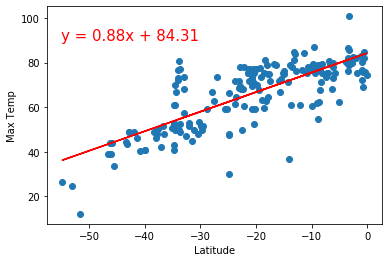

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


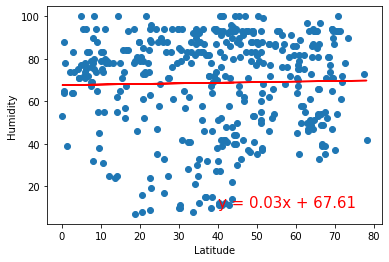

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


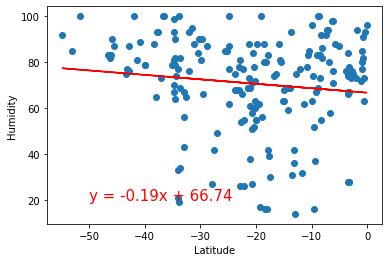

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


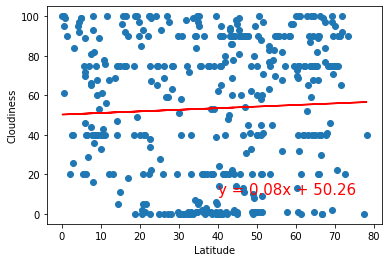

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


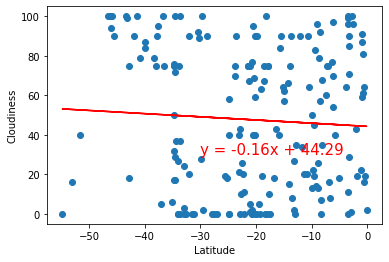

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


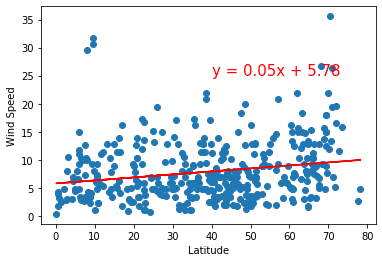

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


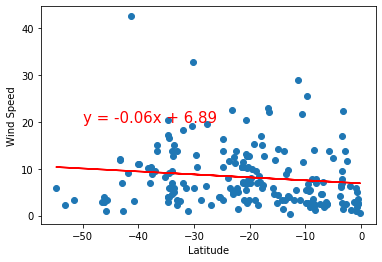